In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the DAFNI-impacts.csv file
dafni_impacts_path = 'DAFNI-impacts.csv'
dafni_impacts_df = pd.read_csv(dafni_impacts_path)

# Load the processed OiDjTable.csv file
oidj_table_processed_path = 'OiDjTable.csv'
oidj_table_processed_df = pd.read_csv(oidj_table_processed_path)


# Integration of DAFNI-impacts data and OiDjTable data

oidj_table_processed_df.rename(columns={'zonei': 'zone'}, inplace=True)
dafni_impacts_enriched_df = pd.merge(dafni_impacts_df, oidj_table_processed_df, left_on='net_i', right_on='zone', how='left')
dafni_impacts_enriched_df.rename(columns={'Oi_all': 'Oi_net_i', 'Dj_all': 'Dj_net_i'}, inplace=True)
dafni_impacts_enriched_df.drop(['zone'], axis=1, inplace=True)

dafni_impacts_enriched_df = pd.merge(dafni_impacts_enriched_df, oidj_table_processed_df, left_on='net_j', right_on='zone', how='left')
dafni_impacts_enriched_df.rename(columns={'Oi_all': 'Oi_net_j', 'Dj_all': 'Dj_net_j'}, inplace=True)
dafni_impacts_enriched_df.drop(['zone'], axis=1, inplace=True)

# Selection of model input features and target outputs
features = dafni_impacts_enriched_df[['Oi_net_i', 'Dj_net_i', 'Oi_net_j', 'Dj_net_j', 'net_secs']].values
target = dafni_impacts_enriched_df['CkDiffRoad'].values

# Data normalisation
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [2]:
from KerasGravityANN import KerasGravityANN

# Initialise instances of the KerasGravityANN class
model = KerasGravityANN(numHiddens=[256, 256])

# model.normaliseInputsLinear(features,target)

# model.normaliseInputsLog(features,target)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training models
model.trainModel(X_train, y_train, batchSize=32, numEpochs=100)



Learning rate at creation:  0.001
Epoch 1/100
181/181 [==============================] - 1s 2ms/step - loss: 0.0195 - mse: 115953662.5199 - val_loss: 0.0000e+00 - val_mse: 109871599.2349
Epoch 2/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mse: 115947966.0453 - val_loss: 0.0000e+00 - val_mse: 109871599.2343
Epoch 3/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mse: 115947620.8160 - val_loss: 0.0000e+00 - val_mse: 109871599.2343
Epoch 4/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mse: 115948341.2221 - val_loss: 0.0000e+00 - val_mse: 109871599.2343
Epoch 5/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mse: 115947939.5827 - val_loss: 0.0000e+00 - val_mse: 109871599.2343
Epoch 6/100
181/181 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - mse: 115947506.0049 - val_loss: 0.0000e+00 - val_mse: 109871599.2343
Epoch 7/100
181/181 [=======

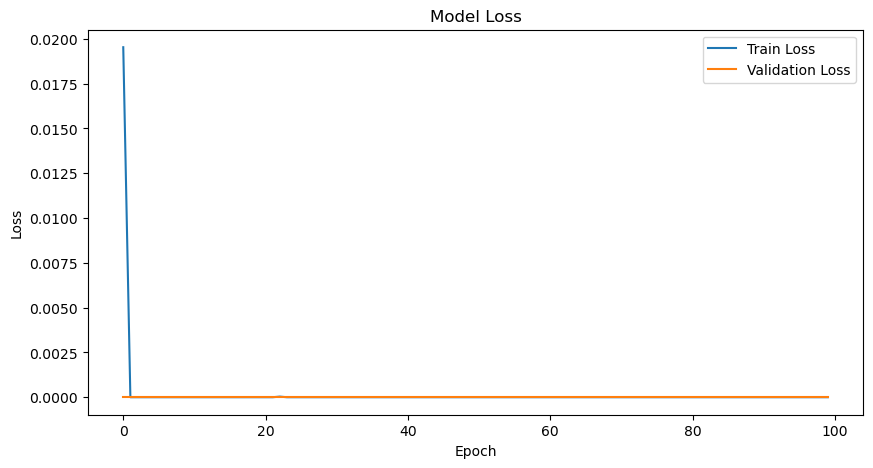

57/57 [==============================] - 0s 711us/step


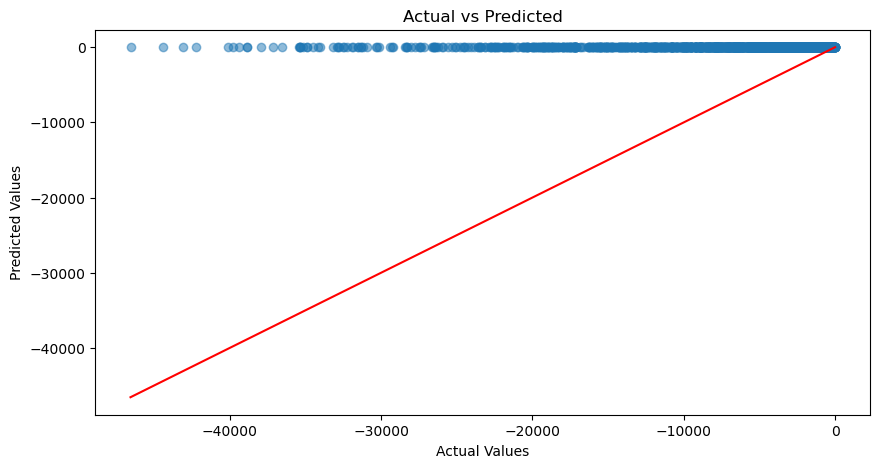

In [3]:
import matplotlib.pyplot as plt

# Plot training & validation losses
plt.figure(figsize=(10, 5))
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

y_pred = model.model.predict(X_test)

# Plotting predicted versus actual values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 对角线
plt.show()
